In [21]:

# Column Explanation
# 1️⃣ Component_ID → Unique ID for each component.
# 2️⃣ Observed_Time_Hours →

# If the component failed, this is the failure time.
# If the component didn’t fail (censored), this is the last recorded time before observation ended.
# 3️⃣ Failure_Event →
# True → The component failed (failure time recorded).
# False → The component was still running when the observation ended (censored).

Basic Statistics:
        Component_ID  Observed_Time_Hours
count    150.000000           150.000000
mean      75.500000          4063.410137
std       43.445368          2229.952549
min        1.000000           147.648345
25%       38.250000          2124.375528
50%       75.500000          4002.649964
75%      112.750000          6339.263785
max      150.000000          7000.000000

Failure vs. Censored Counts:
 Failure_Event
True     118
False     32
Name: count, dtype: int64


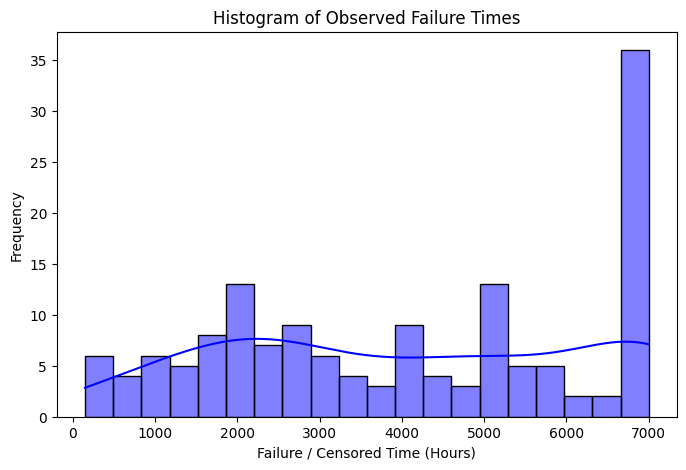

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.special as sp

# Exploratory Data Analysis (EDA) is the first step before Weibull analysis because it helps you:

# 1️⃣ Understand Your Data Structure

# Identify missing values, outliers, or incorrect entries.
# Check the distribution of failure times.
# 2️⃣ Determine Failure Patterns

# Does failure occur randomly or increase over time?
# Are there early failures (infant mortality) or wear-out failures?
# Helps decide if a Weibull distribution is appropriate.
# 3️⃣ Assess Censoring Impact

# If many components are censored (Failure_Event = False), it affects Weibull parameter estimation.





# Load the dataset
file_path = r"C:\Users\Ansh Tanwar\Downloads\weibull_lifecycle_data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Basic Statistics
print("Basic Statistics:\n", df.describe())

# Count of Failed vs. Censored Components
failure_counts = df["Failure_Event"].value_counts()
print("\nFailure vs. Censored Counts:\n", failure_counts)

# Histogram of Failure Times
plt.figure(figsize=(8, 5))
sns.histplot(df["Observed_Time_Hours"], bins=20, kde=True, color="blue")
plt.xlabel("Failure / Censored Time (Hours)")
plt.ylabel("Frequency")
plt.title("Histogram of Observed Failure Times")
plt.show()

1️⃣ Spread of Failures

Failures are spread across different time intervals, with peaks around 2000, 5000, and 7000 hours.
This suggests some components fail early, some mid-life, and some last long.

2️⃣ High Censorship at 7000 Hours

The large bar at 7000 hours likely represents censored data (components still running at the end of observation).
This means many components haven't failed yet, which affects Weibull analysis.

3️⃣ Failure Trend

The blue KDE (smooth curve) suggests failure rates fluctuate rather than steadily increasing.
This could indicate mixed failure modes—some parts failing due to early defects, others due to wear-out.

Weibull Shape Parameter (β): 1.7977
Weibull Scale Parameter (η): 3654.9328


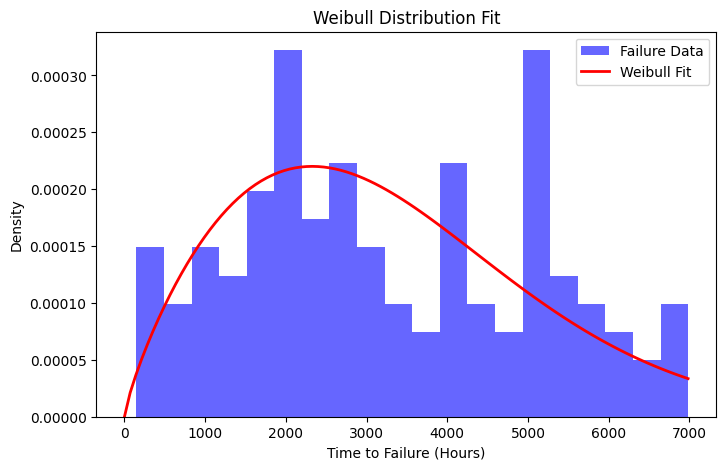

In [23]:
# Extract failure times only (ignoring censored data)
failure_times = df[df["Failure_Event"] == True]["Observed_Time_Hours"].values

# Fit Weibull distribution using Maximum Likelihood Estimation (MLE)
shape, loc, scale = stats.weibull_min.fit(failure_times, floc=0)  # floc=0 fixes location at zero

# Print Weibull parameters
print(f"Weibull Shape Parameter (β): {shape:.4f}")
print(f"Weibull Scale Parameter (η): {scale:.4f}")

# Plot Weibull Probability Density Function (PDF)
x = np.linspace(0, max(failure_times), 100)
y = stats.weibull_min.pdf(x, shape, loc, scale)

plt.figure(figsize=(8, 5))
plt.hist(failure_times, bins=20, density=True, alpha=0.6, color="blue", label="Failure Data")
plt.plot(x, y, 'r-', lw=2, label="Weibull Fit")
plt.xlabel("Time to Failure (Hours)")
plt.ylabel("Density")
plt.title("Weibull Distribution Fit")
plt.legend()
plt.show()

Interpretation of Weibull Parameters
You have successfully estimated the Weibull parameters:

1️⃣ Shape Parameter (β) = 1.7977
✅ Since β > 1, failure rate increases over time (wear-out failure mode).
✅ Components are aging and deteriorating as time progresses.

2️⃣ Scale Parameter (η) = 3654.93 hours
✅ This means 63.2% of components are expected to fail by 3655 hours.
✅ A higher η means components generally last longer before failure.

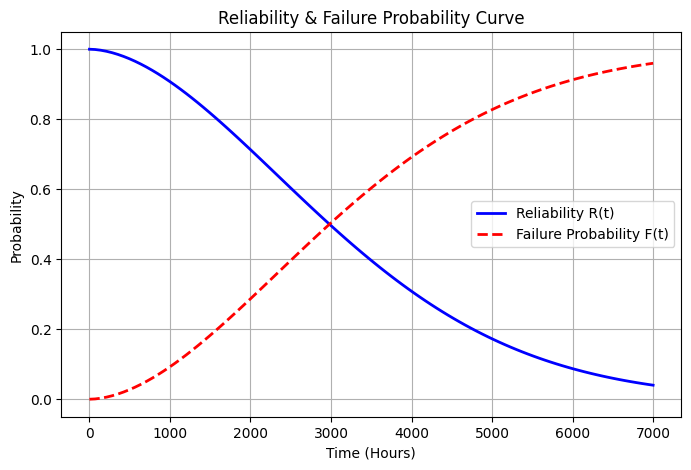

In [24]:
# Define Weibull Parameters 
beta = 1.7977  # Shape parameter
eta = 3654.93  # Scale parameter

# Define time range for analysis
time_values = np.linspace(0, 7000, 100)  # Time from 0 to 7000 hours

# Calculate Reliability R(t) and Failure Probability F(t)
reliability = np.exp(-(time_values / eta) ** beta)  # R(t) = e^(- (t/η)^β)
# print("reliability :", reliability)

failure_probability = 1 - reliability  # F(t) = 1 - R(t)
# print("failure_probability :", failure_probability)

# Plot Reliability & Failure Probability Curves
plt.figure(figsize=(8, 5))
plt.plot(time_values, reliability, label="Reliability R(t)", color="blue", linewidth=2)
plt.plot(time_values, failure_probability, label="Failure Probability F(t)", color="red", linestyle="--", linewidth=2)

plt.xlabel("Time (Hours)")
plt.ylabel("Probability")
plt.title("Reliability & Failure Probability Curve")
plt.legend()
plt.grid(True)
plt.show()

Interpretation of the Graph
✅ Reliability Curve (R(t)) - Blue Line

Starts at 1.0 (100%) at t = 0, meaning all components are working initially.
Decreases over time as failures occur.
At t ≈ 3654 hours (scale parameter η), reliability is around 36.8%, meaning ~63.2% of components have failed by this time.
✅ Failure Probability Curve (F(t)) - Red Dashed Line

Starts at 0.0 (0%) at t = 0, meaning no failures initially.
Increases over time, showing the cumulative failure probability.
As time progresses, failure probability approaches 1.0, indicating almost all components have failed.
📌 Key Insight:

The two curves are complementary (R(t) + F(t) = 1).
The point where R(t) = 0.5 indicates the median lifetime.
The rate of decrease in R(t) and increase in F(t) depends on the shape parameter (β).

In [25]:
# MTTF represents the expected lifetime of a component before failure, calculated using the Weibull distribution formulaMTTF=η⋅Γ(1+ 
# Calculate Mean Time to Failure (MTTF)
MTTF = eta * sp.gamma(1 + (1 / beta))

print(f"Mean Time to Failure (MTTF): {MTTF:.2f} hours")


Mean Time to Failure (MTTF): 3250.48 hours


Interpretation of MTTF (3250.48 hours)
✅ What It Means:

On average, a component is expected to fail after 3250.48 hours.
This is not the same as the median lifetime (which is closer to the scale parameter η = 3654.93).
MTTF is useful for predictive maintenance, as it gives an estimate of when most failures occur.
✅ Key Observations:

Since β < 2, failures are more random, not sudden wear-out failures.
If β > 1, failures increase over time due to aging effects.